In [1]:
# prerequisites
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:

import random

class MySGDRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = []

    # simple stochastic GD
    def fit(self, x, y, learningRate = 0.001, noEpochs = 1000):
        self.coef_ = [0.0 for _ in range(len(x[0]) + 1)]    #beta or w coefficients y = w0 + w1 * x1 + w2 * x2 + ...
        # self.coef_ = [random.random() for _ in range(len(x[0]) + 1)]    #beta or w coefficients 
        for epoch in range(noEpochs):
            # TBA: shuffle the trainind examples in order to prevent cycles
            for i in range(len(x)): # for each sample from the training data
                ycomputed = self.eval(x[i])     # estimate the output
                crtError = ycomputed - y[i]     # compute the error for the current sample
                for j in range(0, len(x[0])):   # update the coefficients
                    self.coef_[j] = self.coef_[j] - learningRate * crtError * x[i][j]
                self.coef_[len(x[0])] = self.coef_[len(x[0])] - learningRate * crtError * 1
        self.intercept_ = self.coef_[-1]
        self.coef_ = self.coef_[:-1]

    def eval(self, xi):
        yi = self.coef_[-1]
        for j in range(len(xi)):
            yi += self.coef_[j] * xi[j]
        return yi 

    def predict(self, x):
        yComputed = [self.eval(xi) for xi in x]
        return yComputed


In [3]:
class MyBGDRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = []

    # batch stochastic GD
    def fit(self, x, y, batch_size=32, learningRate=0.001, noEpochs=1000):
        self.coef_ = [0.0 for _ in range(len(x[0]) + 1)]  # beta or w coefficients y = w0 + w1 * x1 + w2 * x2 + ...
        for epoch in range(noEpochs):
            # Shuffle the training examples in order to prevent cycles
            indices = list(range(len(x)))
            random.shuffle(indices)
            for i in range(0, len(x), batch_size):  # Iterate over batches
                batch_indices = indices[i:i + batch_size]
                batch_x = [x[idx] for idx in batch_indices]
                batch_y = [y[idx] for idx in batch_indices]
                gradients = self.compute_gradients(batch_x, batch_y)
                for j in range(len(x[0])):
                    self.coef_[j] -= learningRate * gradients[j]
                self.coef_[-1] -= learningRate * gradients[-1]

        self.intercept_ = self.coef_[-1]
        self.coef_ = self.coef_[:-1]

    def compute_gradients(self, x_batch, y_batch):
        gradients = [0.0 for _ in range(len(x_batch[0]) + 1)]
        for i in range(len(x_batch)):
            ycomputed = self.eval(x_batch[i])  # Estimate the output
            crtError = ycomputed - y_batch[i]  # Compute the error for the current sample
            for j in range(len(x_batch[0])):  # Update the gradients
                gradients[j] += crtError * x_batch[i][j]
            gradients[-1] += crtError * 1
        return gradients

    def eval(self, xi):
        yi = self.coef_[-1]
        for j in range(len(xi)):
            yi += self.coef_[j] * xi[j]
        return yi

    def predict(self, x):
        yComputed = [self.eval(xi) for xi in x]
        return yComputed


In [4]:
# load data and consider a single feature (Economy..GDP.per.capita) and the output to be estimated (happiness)

def loadData(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariables = [dataNames.index(inputVariabNames[i]) for i in range(len(inputVariabNames))]
    inputs = [[float(data[i][selectedVariable]) for selectedVariable in selectedVariables] for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, ['Economy..GDP.per.Capita.'], 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

in:   [[1.61646318435669], [1.48238301277161], [1.480633020401], [1.56497955322266], [1.44357192516327]]
out:  [7.53700017929077, 7.52199983596802, 7.50400018692017, 7.49399995803833, 7.4689998626709]


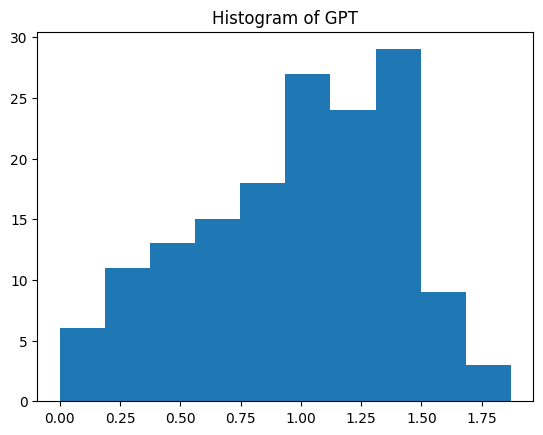

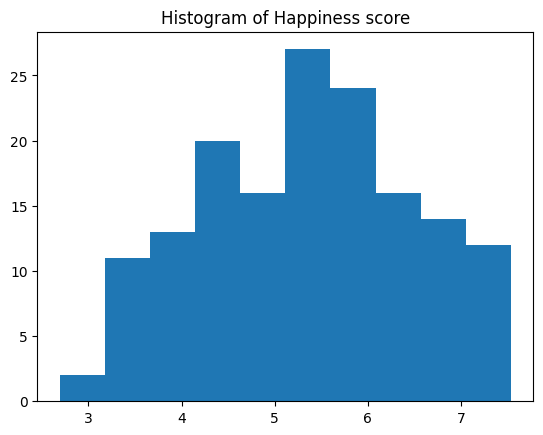

In [5]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogram([inputs[i][0] for i in range(len(inputs))], 'GPT')
plotDataHistogram(outputs, 'Happiness score')

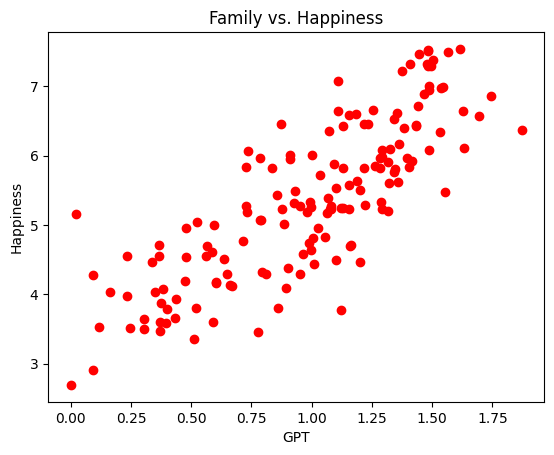

In [6]:
plt.plot(inputs, outputs, 'ro')
plt.xlabel('GPT')
plt.ylabel('Happiness')
plt.title('Family vs. Happiness')
plt.show()

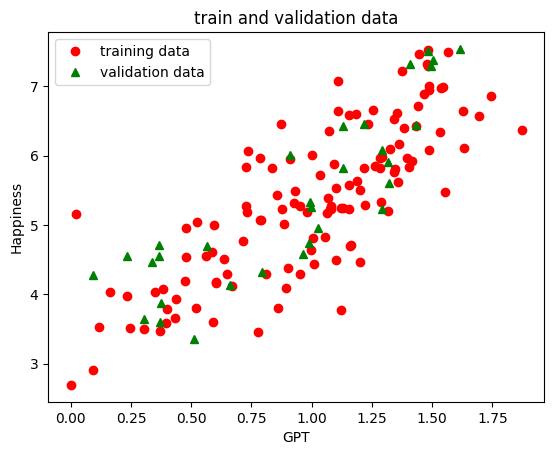

In [7]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
validationSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')   #train data are plotted by red and circle sign
plt.plot(validationInputs, validationOutputs, 'g^', label = 'validation data')     #test data are plotted by green and a triangle sign
plt.title('train and validation data')
plt.xlabel('GPT')
plt.ylabel('Happiness')
plt.legend()
plt.show()

In [8]:
# learning step: init and train a linear regression model y = f(x) = w0 + w1 * x
# Prediction step: used the trained model to estimate the output for a new input


# training data preparation (the sklearn linear model requires as input training data as noSamples x noFeatures array; in the current case, the input must be a matrix of len(trainInputs) lineas and one columns (a single feature is used in this problem))
# xx = [el for el in trainInputs]
# # using sklearn 
# from sklearn import linear_model
# # model initialisation
# regressor = linear_model.SGDRegressor(alpha = 0.01, max_iter = 100)
# # training the model by using the training inputs and known training outputs
# regressor.fit(xx, trainOutputs)
# # save the model parameters
# w0, w1 = regressor.intercept_[0], regressor.coef_[0]
# print('the learnt model using sklearn: f(x) = ', w0, ' + ', w1, ' * x')
# 




# ----------------------------------------using developed code SGD -----------------------------------------------
# xx = trainInputs
# # model initialisation
# regressor = MySGDRegression()
# # training the model by using the training inputs and known training outputs
# regressor.fit(xx, trainOutputs)
# # save the model parameters
# w0, w1 = regressor.intercept_, regressor.coef_[0]
# print('the learnt model uusing SGD: f(x) = ', w0, ' + ', w1, ' * x')
# 
# 



# ----------------------------------------using developed code BGD -----------------------------------------------
xx = trainInputs
# model initialisation
regressor = MyBGDRegression()
# training the model by using the training inputs and known training outputs
regressor.fit(xx, trainOutputs)
# save the model parameters
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model uusing BGD: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model uusing BGD: f(x) =  3.198945551338775  +  2.148644642710726  * x


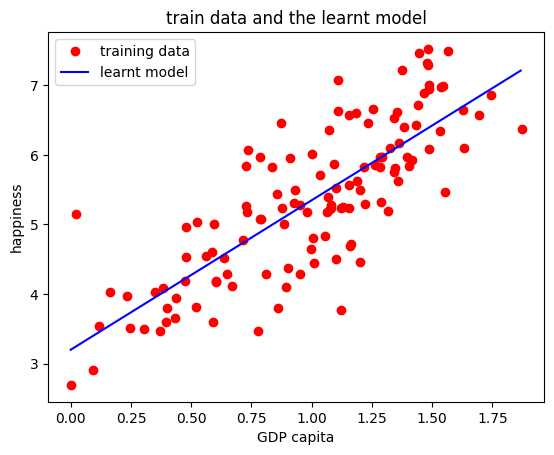

In [9]:
# plot the learnt model
# plot the learnt model
# prepare some synthetic data (inputs are random, while the outputs are computed by the learnt model)
noOfPoints = 1000
xref = []
val = min(trainInputs)[0]
min_val = min(trainInputs)
max_val = max(trainInputs)
step = (max_val[0]-min_val[0]) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref] 

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')  #train data are plotted by red and circle sign
plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

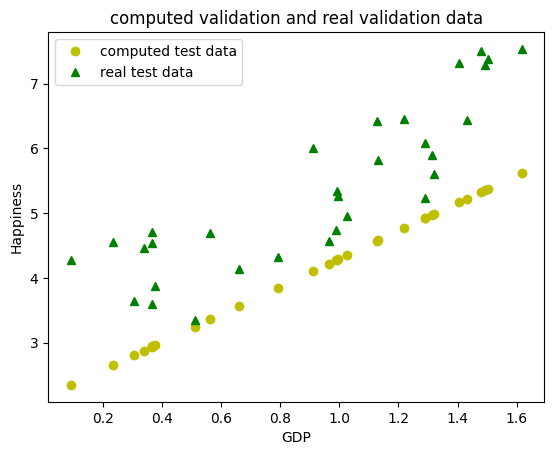

In [10]:
# makes predictions for test data (manual)
# computedTestOutputs = [w0 + w1 * el for el in testInputs]
computedValidationOutputs = regressor.predict(validationInputs)

plt.plot(validationInputs, computedValidationOutputs, 'yo', label = 'computed test data') 
plt.plot(validationInputs, validationOutputs, 'g^', label = 'real test data')  
plt.title('computed validation and real validation data')
plt.xlabel('GDP')
plt.ylabel('Happiness')
plt.legend()
plt.show()

In [11]:
# "manual" computation
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)

# by using sklearn
from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)

prediction error (manual):  1.9014702614523387
prediction error (tool):   1.9014702614523384


Predictie a gradului de fericire in functie de PIB si de gradul de libertate:

In [12]:
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

in:   [[1.61646318435669, 0.635422587394714], [1.48238301277161, 0.626006722450256], [1.480633020401, 0.627162635326385], [1.56497955322266, 0.620070576667786], [1.44357192516327, 0.617950856685638]]
out:  [7.53700017929077, 7.52199983596802, 7.50400018692017, 7.49399995803833, 7.4689998626709]


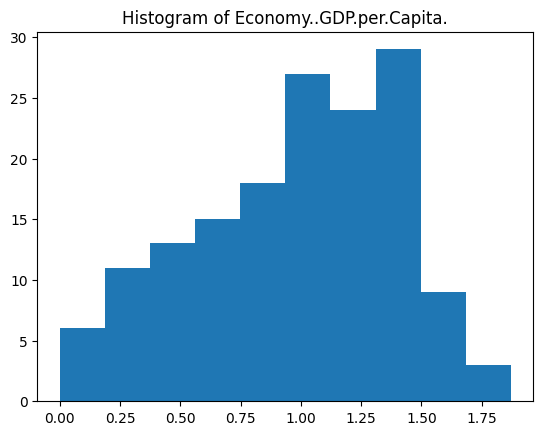

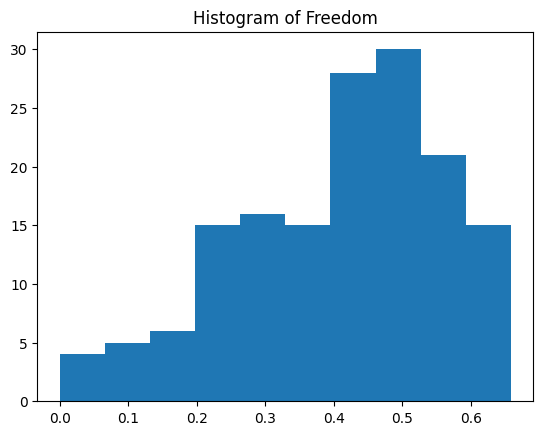

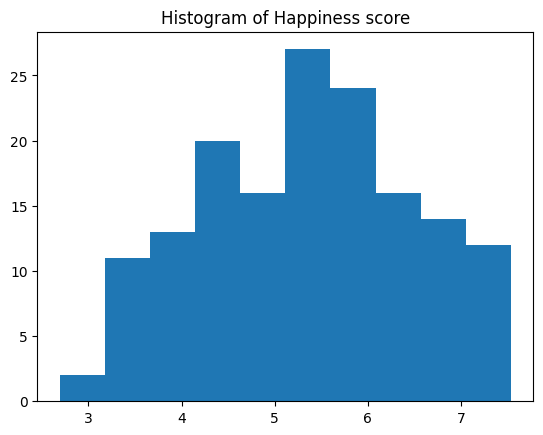

In [13]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()


plotDataHistogram([inputs[i][0] for i in range(len(inputs))], 'Economy..GDP.per.Capita.')
plotDataHistogram([inputs[i][1] for i in range(len(inputs))], 'Freedom')
plotDataHistogram(outputs, 'Happiness score')

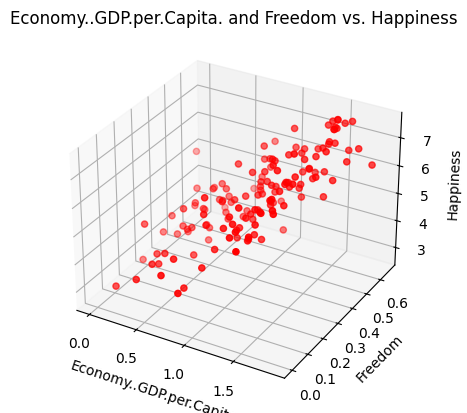

In [14]:
# Extract features from inputs
feature1 = [x[0] for x in inputs]
feature2 = [x[1] for x in inputs]

# Plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot inputs against outputs
ax.scatter(feature1, feature2, outputs, c='r', marker='o')

# Label axes
ax.set_xlabel('Economy..GDP.per.Capita.')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness')

# Add a title
plt.title('Economy..GDP.per.Capita. and Freedom vs. Happiness')

plt.show()

In [15]:
from math import sqrt

def plot3Ddata(x1Train, x2Train, yTrain, x1Model = None, x2Model = None, yModel = None, x1Test = None, x2Test = None, yTest = None, title = None):
    from mpl_toolkits import mplot3d
    ax = plt.axes(projection = '3d')
    if (x1Train):
        plt.scatter(x1Train, x2Train, yTrain, c = 'r', marker = 'o', label = 'train data') 
    if (x1Model):
        plt.scatter(x1Model, x2Model, yModel, c = 'b', marker = '_', label = 'learnt model') 
    if (x1Test):
        plt.scatter(x1Test, x2Test, yTest, c = 'g', marker = '^', label = 'test data')  
    plt.title(title)
    ax.set_xlabel("capita")
    ax.set_ylabel("freedom")
    ax.set_zlabel("happiness")
    plt.legend()
    plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        #encode each sample into a list
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]
        
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
        
        #decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData

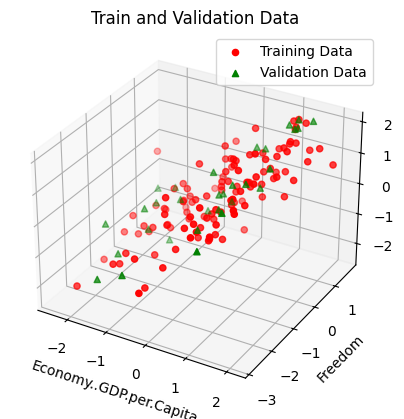

In [17]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]


trainInputs, validationInputs = normalisation(trainInputs, testInputs)
trainOutputs, validationOutputs = normalisation(trainOutputs, testOutputs)


validationInputs1 = np.array(validationInputs)
validationOutputs1 = np.array(validationOutputs)

trainInputs1 = np.array(trainInputs)
trainOutputs1 = np.array(trainOutputs)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot training data
ax.scatter(trainInputs1[:, 0], trainInputs1[:, 1], trainOutputs1, c='r', marker='o', label='Training Data')

# Plot validation data
ax.scatter(validationInputs1[:, 0], validationInputs1[:, 1], validationOutputs1, c='g', marker='^', label='Validation Data')

# Label axes
ax.set_xlabel('Economy..GDP.per.Capita.')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness')

# Add a title
plt.title('Train and Validation Data')

# Add a legend
plt.legend()

plt.show()


In [18]:
# xx = [[el] for el in trainInputs]
xx = trainInputs

# model initialisation
# regressor = linear_model.LinearRegression()
# regressor.fit(xx, trainOutputs)

xx1 = [sublista[0] for sublista in xx ]
xx2 = [sublista[1] for sublista in xx ]
regressor = MyBGDRegression()
regressor.fit(trainInputs,  trainOutputs)
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x1', ' + ', w2, ' * x2')


the learnt model: f(x) =  -0.00019485366173265873  +  0.6983141195893058  * x1  +  0.30546356083276943  * x2


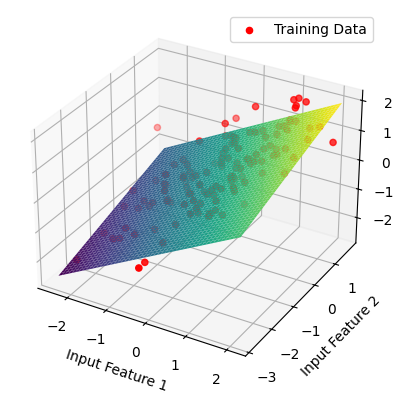

In [19]:
# Generate synthetic data
noOfPoints = 1000
x1_ref = np.linspace(min(trainInputs1[:, 0]), max(trainInputs1[:, 0]), noOfPoints)
x2_ref = np.linspace(min(trainInputs1[:, 1]), max(trainInputs1[:, 1]), noOfPoints)

X1_ref, X2_ref = np.meshgrid(x1_ref, x2_ref)
Y_ref = w0 + w1 * X1_ref + w2 * X2_ref 

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1_ref, X2_ref, Y_ref, cmap='viridis')

# Plot training data
ax.scatter(trainInputs1[:, 0], trainInputs1[:, 1], trainOutputs1, c='r', marker='o', label='Training Data')

# Label axes
ax.set_xlabel('Input Feature 1')
ax.set_ylabel('Input Feature 2')
ax.set_zlabel('Output')

# Add a legend
plt.legend()

plt.show()

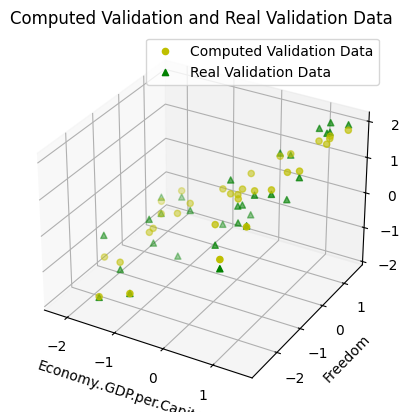

In [20]:
# Extract features from validationInputs
feature1 = [x[0] for x in validationInputs]
feature2 = [x[1] for x in validationInputs]

computedValidationOutputs = regressor.predict(validationInputs)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot computed validation outputs
ax.scatter(feature1, feature2, computedValidationOutputs, c='y', marker='o', label='Computed Validation Data')

# Plot real validation outputs
ax.scatter(feature1, feature2, validationOutputs, c='g', marker='^', label='Real Validation Data')

# Label axes
ax.set_xlabel('Economy..GDP.per.Capita.')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness')

# Add a title
plt.title('Computed Validation and Real Validation Data')

# Add a legend
plt.legend()

plt.show()

In [21]:
# compute the differences between the predictions and real outputs
# "manual" computation

error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)

# by using sklearn
from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)

prediction error (manual):  0.23357653006946505
prediction error (tool):   0.23357653006946505
